<a href="https://colab.research.google.com/github/zaterka/ML-studies-and-examples/blob/main/Studies_Deep_Learning_from_scratch_Grokking_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks from scratch - Deep Learning Studies

This notebook contains code examples from the book **Grooking Deep Learning** by Andrew W. Trask.

In [ ]:
import numpy as np

# Chapter 3 - Forward Propagation

## Simple neural network making a prediction

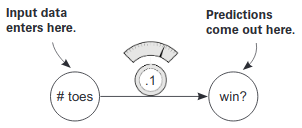

In [ ]:
weight = 0.1

def neural_network(input, weight):
  prediction = input * weight
  return prediction

In [ ]:
number_of_toes = [8.5, 9.5, 10, 9]

input = number_of_toes[0]

pred = neural_network(input, weight)

print(pred)

0.8500000000000001


## Making a prediction with multiple inputs

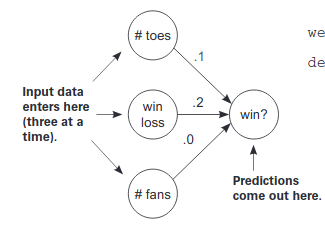

In [ ]:
weights = [0.1, 0.2, 0]

def w_sum(a, b):
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)):
    output += (a[i] * b[i])
  return output


def neural_network(input, weights):
  pred = w_sum(input, weights)
  return pred

In [ ]:
toes = [8.5, 95, 9.9, 9.0] # curent average number of toes per player
wlrec = [0.65, 0.8, 0.8, 0.9] # current gaames won (percent)
nfans = [1.2, 1.3, 0.5, 1.0] # fan count (in millions)

input = [toes[0], wlrec[0], nfans[0]]

pred = neural_network(input, weights)

print(pred)

0.9800000000000001


In [ ]:
# using NumPy's dot function
import numpy as np

weights = np.array([0.1, 0.2, 0])

def neural_network(input, weights):     
  pred = input.dot(weights)    
  return pred

toes = np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65, 0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])
input = np.array([toes[0],wlrec[0],nfans[0]])

pred = neural_network(input,weights)
print(pred)

0.9800000000000001


## Making a prediction with multiple outputs

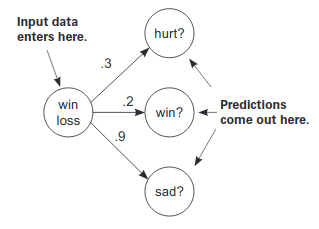

In [ ]:
# Instead of predicting just whether the team won or lost,
# it also predictis whether the players are happy or sad 
# and the percentage of team members who are hurt.
# The prediction is made using only the current win/loss ratio.


weights = [0.3, 0.2, 0.9]

# elementwise multiplication
def ele_mul(number,vector):
  output = [0, 0, 0]
  assert(len(output) == len(vector))
  
  for i in range(len(vector)):
    output[i] = number * vector[i]
  
  return output


def neural_network(input, weights):
  pred = ele_mul(input, weights)
  return pred


In [ ]:
wlrec = [0.65, 0.8, 0.8, 0.9]
input = wlrec[0]
pred = neural_network(input, weights)
print(pred) # respectively: hurt prediction, win prediction and  sad prediction

[0.195, 0.13, 0.5850000000000001]


## Predicting with multiple inputs and outputs

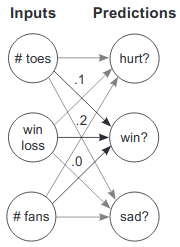

In [ ]:
          # toes %win  #fans     
weights = [[0.1, 0.1, -0.3], # hurt?
           [0.1, 0.2, 0.0], # win?
           [0.0, 1.3, 0.1]] # sad?

def w_sum(a,b): #weighted sum
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)):
    output += (a[i] * b[i])
  return output

def vect_mat_mul(vect, matrix):
  assert(len(vect) == len(matrix))
  output = [0, 0, 0]
  for i in range(len(vect)):
    output[i] = w_sum(vect, matrix[i])
  return output

def neural_network(input, weights):
  pred = vect_mat_mul(input, weights)
  return pred


In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = [toes[0], wlrec[0], nfans[0]] # input every entry for the first game

pred = neural_network(input, weights)

print(pred)

[0.555, 0.9800000000000001, 0.9650000000000001]


## Predicting on predictions
### Stacking neural networks

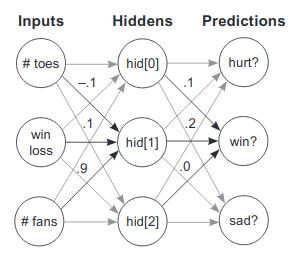

In [ ]:
#         # toes % win  #fans
ih_wgt = [[0.1, 0.2, -0.1], # hid[0]
          [-0.1, 0.1, 0.9], # hid[1]
          [0.1, 0.4, 0.1]]  # hid[2]

#         hid[0] hid[1] hid[2]
hp_wgt = [[0.3, 1.1, -0.3], # hurt?
          [0.1, 0.2, 0.0],  # win?
          [0.0, 1.3, 0.1]]  # sad?

weights = [ih_wgt, hp_wgt]

def neural_network(input, weights):

  hid = vect_mat_mul(input, weights[0])
  pred = vect_mat_mul(hid, weights[1])
  return pred

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

input = [toes[0], wlrec[0], nfans[0]]

pred = neural_network(input, weights)
print(pred)

[0.21350000000000002, 0.14500000000000002, 0.5065]


In [ ]:
# NumPy version

import numpy as np
#                  # toes % win # fans
ih_wgt = np.array([[0.1, 0.2, -0.1], # hid[0]            
                  [-0.1,0.1, 0.9], # hid[1]            
                  [0.1, 0.4, 0.1]]).T # hid[2]

#                  hid[0] hid[1] hid[2]
hp_wgt = np.array([[0.3, 1.1, -0.3], # hurt?
                   [0.1, 0.2, 0.0], # win?
                   [0.0, 1.3, 0.1] ]).T # sad?

weights = [ih_wgt, hp_wgt]

def neural_network(input, weights):
  hid = input.dot(weights[0])
  pred = hid.dot(weights[1])
  return pred
  
toes =  np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65,0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

input = np.array([toes[0],wlrec[0],nfans[0]])

pred = neural_network(input,weights)
print(pred)

[0.2135 0.145  0.5065]


# Chapter 4 - Gradient Descent 


In [ ]:
# simple error measure
knob_weight = 0.5
input = 0.5
goal_pred = 0.8

pred = input * knob_weight

error = (pred - goal_pred) ** 2

print(error)

0.30250000000000005


## Hot and Cold

In [ ]:
# An empty network

weight = 0.1

lr = 0.01

def neural_network(input, weight):

  prediction = input * weight

  return prediction

In [ ]:
# PREDICT: Making a prediction and evaluating error

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)

input = number_of_toes[0]
true = win_or_lose_binary[0]

pred = neural_network(input, weight)

error = (pred - true) ** 2
print(error)

0.022499999999999975


In [ ]:
# COMPARE: Making a prediction with a higher weight and evaluating error

lr = 0.1

p_up = neural_network(input, weight+lr)
e_up = (p_up - true) ** 2
print(e_up)

0.49000000000000027


In [ ]:
# COMPARE: Making a prediction with a lower weight and evaluating error

lr = 0.01

p_dn = neural_network(input, weight-lr)
e_dn = (p_dn - true) ** 2
print(e_dn)

0.05522499999999994


In [ ]:
# COMPARE + LEARN: Comparing the errors and setting the new weight

if(error > e_dn or error > e_up):
  if(e_dn < e_up):
			weight -= lr
  if(e_up < e_up):
			weight += lr

## Hot and cold learning
### This is perhaps the simplest form of learning.

In [ ]:
weight = 0.5
input = 0.5
goal_prediction = 0.8

step_amount = 0.001

for interation in range(1101):
  prediction = input * weight
  error = (prediction - goal_prediction) ** 2

  print("Error:" + str(error) + " Prediction:" + str(prediction))

  up_prediction = input * (weight + step_amount) # try up
  up_error = (goal_prediction - up_prediction) ** 2

  down_prediction = input * (weight - step_amount) # try down
  down_error = (goal_prediction - down_prediction) ** 2

  if(down_error < up_error):
    weight = weight - step_amount

  if(down_error > up_error):
    weight = weight + step_amount

Error:0.30250000000000005 Prediction:0.25
Error:0.3019502500000001 Prediction:0.2505
Error:0.30140100000000003 Prediction:0.251
Error:0.30085225 Prediction:0.2515
Error:0.30030400000000007 Prediction:0.252
Error:0.2997562500000001 Prediction:0.2525
Error:0.29920900000000006 Prediction:0.253
Error:0.29866224999999996 Prediction:0.2535
Error:0.29811600000000005 Prediction:0.254
Error:0.2975702500000001 Prediction:0.2545
Error:0.29702500000000004 Prediction:0.255
Error:0.29648025 Prediction:0.2555
Error:0.29593600000000003 Prediction:0.256
Error:0.2953922500000001 Prediction:0.2565
Error:0.294849 Prediction:0.257
Error:0.29430625 Prediction:0.2575
Error:0.293764 Prediction:0.258
Error:0.2932222500000001 Prediction:0.2585
Error:0.292681 Prediction:0.259
Error:0.29214025 Prediction:0.2595
Error:0.2916 Prediction:0.26
Error:0.2910602500000001 Prediction:0.2605
Error:0.29052100000000003 Prediction:0.261
Error:0.28998225 Prediction:0.2615
Error:0.28944400000000003 Prediction:0.262
Error:0.2889

In [ ]:
weight = 0.5
goal_pred = 0.8
input = 0.5
# gradient descent -> calculate both the direction and the amoubt you should change weight to reduce error

for iteration in range(20):

  pred = input * weight
  error = (pred - goal_pred) ** 2
  direction_and_amount = (pred - goal_pred) * input # pure error x scaling, negative reversal and stopping
  weight = weight - direction_and_amount
  print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.30250000000000005 Prediction:0.25
Error:0.17015625000000004 Prediction:0.3875
Error:0.095712890625 Prediction:0.49062500000000003
Error:0.05383850097656251 Prediction:0.56796875
Error:0.03028415679931642 Prediction:0.6259765625
Error:0.0170348381996155 Prediction:0.669482421875
Error:0.00958209648728372 Prediction:0.70211181640625
Error:0.005389929274097089 Prediction:0.7265838623046875
Error:0.0030318352166796153 Prediction:0.7449378967285156
Error:0.0017054073093822882 Prediction:0.7587034225463867
Error:0.0009592916115275371 Prediction:0.76902756690979
Error:0.0005396015314842384 Prediction:0.7767706751823426
Error:0.000303525861459885 Prediction:0.7825780063867569
Error:0.00017073329707118678 Prediction:0.7869335047900676
Error:9.603747960254256e-05 Prediction:0.7902001285925507
Error:5.402108227642978e-05 Prediction:0.7926500964444131
Error:3.038685878049206e-05 Prediction:0.7944875723333098
Error:1.7092608064027242e-05 Prediction:0.7958656792499823
Error:9.614592036015323

## One iteration of gradient descent
###This performs a weight update on a single training example(input->true) pair.

In [ ]:
# An empty network
weight = 0.1
alpha = 0.01

def neural_network(input, weight):
  prediction = input * weight
  return prediction

In [ ]:
# PREDICT: Making a prediction and evaluating error

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]
pred = neural_network(input,weight)
error = (pred - goal_pred) ** 2

In [ ]:
# COMPARE: Calculating the node delta and putting it on the output node
number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]
pred = neural_network(input,weight)
error = (pred - goal_pred) ** 2

delta = pred - goal_pred

In [ ]:
# LEARN: Calculating the weight delta and putting it on the weight
number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]
pred = neural_network(input,weight)
error = (pred - goal_pred) ** 2
delta = pred - goal_pred

weight_delta = input * delta

In [ ]:
# LEARN: Updating the weight

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
goal_pred = win_or_lose_binary[0]
pred = neural_network(input,weight)
error = (pred - goal_pred) ** 2
delta = pred - goal_pred
weight_delta = input * delta
alpha = 0.01

weight -= weight_delta * alpha

In [ ]:
# Learning is just reducing error
# You can modify weight to reduce error.
weight, goal_pred, input = (0.0, 0.8, 0.5)
for iteration in range(4):

  pred = input * weight           # These lines
  error = (pred - goal_pred) ** 2 # have a secret.
  delta = pred - goal_pred
  weight_delta = delta * input
  weight = weight - weight_delta
  print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.6400000000000001 Prediction:0.0
Error:0.3600000000000001 Prediction:0.2
Error:0.2025 Prediction:0.35000000000000003
Error:0.11390625000000001 Prediction:0.4625


**The secret**

For any input and goal_pred , an exact relationship is defined between error and weight ,
found by combining the prediction and error formulas. In this case:

*error = ((0.5 * weight) - 0.8) ** 2*

## Let’s watch several steps of learning
### Will we eventually find the bottom of the bowl?

In [ ]:
weight, goal_pred, input = (0.0, 0.8, 1.1)
for iteration in range(4):
  print("-----\nWeight:" + str(weight))
  pred = input * weight
  error = (pred - goal_pred) ** 2
  delta = pred - goal_pred
  weight_delta = delta * input
  weight = weight - weight_delta
  print("Error:" + str(error) + " Prediction:" + str(pred))
  print("Delta:" + str(delta) + " Weight Delta:" + str(weight_delta))

-----
Weight:0.0
Error:0.6400000000000001 Prediction:0.0
Delta:-0.8 Weight Delta:-0.8800000000000001
-----
Weight:0.8800000000000001
Error:0.02822400000000005 Prediction:0.9680000000000002
Delta:0.16800000000000015 Weight Delta:0.1848000000000002
-----
Weight:0.6951999999999999
Error:0.0012446784000000064 Prediction:0.76472
Delta:-0.03528000000000009 Weight Delta:-0.0388080000000001
-----
Weight:0.734008
Error:5.4890317439999896e-05 Prediction:0.8074088
Delta:0.007408799999999993 Weight Delta:0.008149679999999992


## Breaking the gradient descent

In [ ]:
weight = 0.5
goal_pred = 0.8
input = 0.5
for iteration in range(20):
  pred = input * weight
  error = (pred - goal_pred) ** 2
  delta = pred - goal_pred
  weight_delta = input * delta
  weight = weight - weight_delta
  print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.30250000000000005 Prediction:0.25
Error:0.17015625000000004 Prediction:0.3875
Error:0.095712890625 Prediction:0.49062500000000003
Error:0.05383850097656251 Prediction:0.56796875
Error:0.03028415679931642 Prediction:0.6259765625
Error:0.0170348381996155 Prediction:0.669482421875
Error:0.00958209648728372 Prediction:0.70211181640625
Error:0.005389929274097089 Prediction:0.7265838623046875
Error:0.0030318352166796153 Prediction:0.7449378967285156
Error:0.0017054073093822882 Prediction:0.7587034225463867
Error:0.0009592916115275371 Prediction:0.76902756690979
Error:0.0005396015314842384 Prediction:0.7767706751823426
Error:0.000303525861459885 Prediction:0.7825780063867569
Error:0.00017073329707118678 Prediction:0.7869335047900676
Error:9.603747960254256e-05 Prediction:0.7902001285925507
Error:5.402108227642978e-05 Prediction:0.7926500964444131
Error:3.038685878049206e-05 Prediction:0.7944875723333098
Error:1.7092608064027242e-05 Prediction:0.7958656792499823
Error:9.614592036015323

In [ ]:
weight = 0.5
goal_pred = 0.8
input = 2 # increasing the input
for iteration in range(20):
  pred = input * weight
  error = (pred - goal_pred) ** 2
  delta = pred - goal_pred
  weight_delta = input * delta
  weight = weight - weight_delta
  print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.03999999999999998 Prediction:1.0
Error:0.3599999999999998 Prediction:0.20000000000000018
Error:3.2399999999999984 Prediction:2.5999999999999996
Error:29.159999999999986 Prediction:-4.599999999999999
Error:262.4399999999999 Prediction:16.999999999999996
Error:2361.959999999998 Prediction:-47.79999999999998
Error:21257.639999999978 Prediction:146.59999999999994
Error:191318.75999999983 Prediction:-436.5999999999998
Error:1721868.839999999 Prediction:1312.9999999999995
Error:15496819.559999991 Prediction:-3935.799999999999
Error:139471376.03999993 Prediction:11810.599999999997
Error:1255242384.3599997 Prediction:-35428.59999999999
Error:11297181459.239996 Prediction:106288.99999999999
Error:101674633133.15994 Prediction:-318863.79999999993
Error:915071698198.4395 Prediction:956594.5999999997
Error:8235645283785.954 Prediction:-2869780.599999999
Error:74120807554073.56 Prediction:8609344.999999996
Error:667087267986662.1 Prediction:-25828031.799999986
Error:6003785411879960.0 Predi

## Alpha in code
### Where does the "alpha" parameter come into play?

In [ ]:
weight = 0.5
goal_pred = 0.8
input = 2
alpha = 0.1
for iteration in range(20):
  pred = input * weight
  error = (pred - goal_pred) ** 2
  derivative = input * (pred - goal_pred)
  weight = weight - (alpha * derivative)
  print("Error:" + str(error) + " Prediction:" + str(pred))

Error:0.03999999999999998 Prediction:1.0
Error:0.0144 Prediction:0.92
Error:0.005183999999999993 Prediction:0.872
Error:0.0018662400000000014 Prediction:0.8432000000000001
Error:0.0006718464000000028 Prediction:0.8259200000000001
Error:0.00024186470400000033 Prediction:0.815552
Error:8.70712934399997e-05 Prediction:0.8093312
Error:3.134566563839939e-05 Prediction:0.80559872
Error:1.1284439629823931e-05 Prediction:0.803359232
Error:4.062398266736526e-06 Prediction:0.8020155392
Error:1.4624633760252567e-06 Prediction:0.8012093235200001
Error:5.264868153690924e-07 Prediction:0.8007255941120001
Error:1.8953525353291194e-07 Prediction:0.8004353564672001
Error:6.82326912718715e-08 Prediction:0.8002612138803201
Error:2.456376885786678e-08 Prediction:0.8001567283281921
Error:8.842956788836216e-09 Prediction:0.8000940369969153
Error:3.1834644439835434e-09 Prediction:0.8000564221981492
Error:1.1460471998340758e-09 Prediction:0.8000338533188895
Error:4.125769919393652e-10 Prediction:0.80002031199

# Chapter 5 - Generilizing gradient descent
## Learning multiple weights at a time

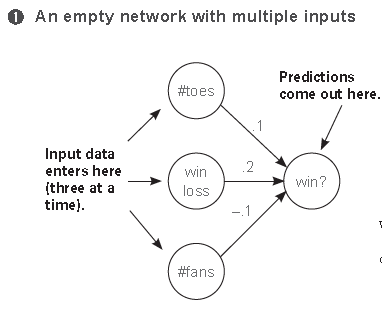

In [ ]:
def w_sum(a, b):
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)) :
    output += (a[i] * b[i])
  return output

weights = [0.1, 0.2, -.1]

def neural_network(input, weights):
  pred = w_sum(input, weights)
  return pred

In [ ]:
# PREDICT + COMPARE: Making a prediction, and calculating error and delta

toes = [8.5 , 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2 , 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
input = [toes[0],wlrec[0],nfans[0]] #input corresponds to every entry for the firstgame of the season
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true

In [ ]:
# LEARN: Calculating each weight_delta and putting it on each weight

def ele_mul(number,vector):
  output = [0,0,0]
  assert(len(output) == len(vector))
  for i in range(len(vector)):
   output[i] = number * vector[i]
  return output

input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input, weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas = ele_mul(delta,input)

# 8.5 * -0.14 = -1.19 = weight_deltas[0]
# 0.65 * -0.14 = -0.091 = weight_deltas[1]
# 1.2 * -0.14 = -0.168 = weight_deltas[2]

In [ ]:
# LEARN: Updating the weights
input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas = ele_mul(delta,input)
alpha = 0.01
for i in range(len(weights)):
  weights[i] -= alpha * weight_deltas[i]
print("Weights:" + str(weights))
print("Weight Deltas:" + str(weight_deltas))

Weights:[0.1119, 0.20091, -0.09832]
Weight Deltas:[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


## Gradient descent with multiple inputs

In [ ]:
# Single input: Making a prediction and calculating error and delta

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
true = win_or_lose_binary[0]

def single_nn(input, weight):
  pred = input * weight
  return pred

pred = single_nn(input,weight=0.1)
error = (pred - true) ** 2
delta = pred - true
print(delta)

-0.1499999999999999


In [ ]:
# Multi-input: Making a prediction and calculating error and delta

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
print(delta)

-0.1399999999999999


In [ ]:
# Single input: Calculating weight_delta and putting it on the weight

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
true = win_or_lose_binary[0]
pred = single_nn(input,weight=0.1)
error = (pred - true) ** 2
delta = pred - true
weight_delta = input * delta
print(weight_delta)

-1.2749999999999992


In [ ]:
# Multi-input: Calculating each weight_delta and putting it on each weight

def ele_mul(number,vector):
  output = [0,0,0]
  assert(len(output) == len(vector))
  for i in range(len(vector)):
    output[i] = number * vector[i]
  return output
input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas = ele_mul(delta,input)
print(weight_deltas)

[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]


In [ ]:
# Updating the weight

number_of_toes = [8.5]
win_or_lose_binary = [1] # (won!!!)
input = number_of_toes[0]
true = win_or_lose_binary[0]
pred = single_nn(input,weight=0.1)
error = (pred - true) ** 2
delta = pred - true
weight_delta = input * delta
alpha = 0.01 # fixed before training
weight -= weight_delta * alpha
print(weight)

0.41275365615844006


In [ ]:
# Updating the weights

input = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas = ele_mul(delta,input)
alpha = 0.01

for i in range(len(weights)):
  weights[i] -= alpha * weight_deltas[i]

print(weights)

[0.11498061250000001, 0.20114557625, -0.09788509000000001]


## Let’s watch several steps of learning


In [ ]:
def neural_network(input, weights):
  out = 0
  for i in range(len(input)):
    out += (input[i] * weights[i])
  return out

def ele_mul(scalar, vector):
  out = [0,0,0]
  for i in range(len(out)):
    out[i] = vector[i] * scalar
  return out
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
alpha = 0.01
weights = [0.1, 0.2, -.1]
input = [toes[0],wlrec[0],nfans[0]]

for iter in range(3):
  pred = neural_network(input,weights)
  error = (pred - true) ** 2
  delta = pred - true
  weight_deltas=ele_mul(delta,input)
  print("Iteration:" + str(iter+1))
  print("Pred:" + str(pred))
  print("Error:" + str(error))
  print("Delta:" + str(delta))
  print("Weights:" + str(weights))
  print("Weight_Deltas:")
  print(str(weight_deltas))
  print(
  )
  for i in range(len(weights)):
    weights[i]-=alpha*weight_deltas[i]

Iteration:1
Pred:0.8600000000000001
Error:0.01959999999999997
Delta:-0.1399999999999999
Weights:[0.1, 0.2, -0.1]
Weight_Deltas:
[-1.189999999999999, -0.09099999999999994, -0.16799999999999987]

Iteration:2
Pred:0.9637574999999999
Error:0.0013135188062500048
Delta:-0.036242500000000066
Weights:[0.1119, 0.20091, -0.09832]
Weight_Deltas:
[-0.30806125000000056, -0.023557625000000044, -0.04349100000000008]

Iteration:3
Pred:0.9906177228125002
Error:8.802712522307997e-05
Delta:-0.009382277187499843
Weights:[0.11498061250000001, 0.20114557625, -0.09788509000000001]
Weight_Deltas:
[-0.07974935609374867, -0.006098480171874899, -0.011258732624999811]



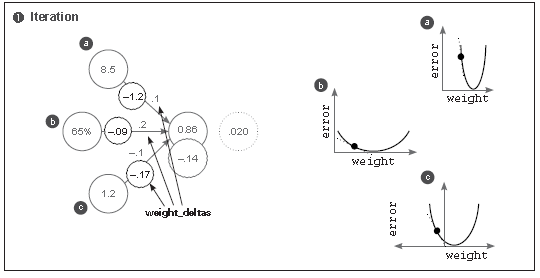

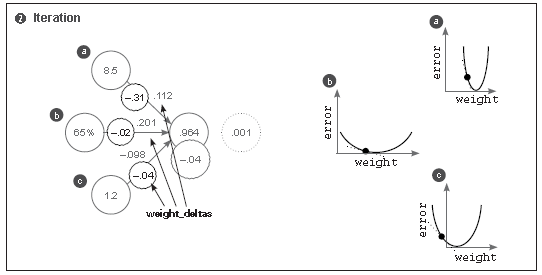

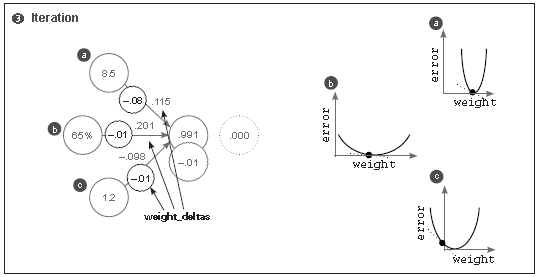

## Freezing one weight: What does it do?

In [ ]:
def neural_network(input, weights):
  out = 0
  for i in range(len(input)):
   out += (input[i] * weights[i])
  return out
def ele_mul(scalar, vector):
  out = [0,0,0]
  for i in range(len(out)):
    out[i] = vector[i] * scalar
  return out
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
alpha = 0.3
weights = [0.1, 0.2, -.1]
input = [toes[0],wlrec[0],nfans[0]]

for iter in range(3):
  pred = neural_network(input,weights)
  error = (pred - true) ** 2
  delta = pred - true
  weight_deltas=ele_mul(delta,input)
  weight_deltas[0] = 0
  print("Iteration:" + str(iter+1))
  print("Pred:" + str(pred))
  print("Error:" + str(error))
  print("Delta:" + str(delta))
  print("Weights:" + str(weights))
  print("Weight_Deltas:")
  print(str(weight_deltas))
  print(
  )
  for i in range(len(weights)):
   weights[i]-=alpha*weight_deltas[i]

Iteration:1
Pred:0.8600000000000001
Error:0.01959999999999997
Delta:-0.1399999999999999
Weights:[0.1, 0.2, -0.1]
Weight_Deltas:
[0, -0.09099999999999994, -0.16799999999999987]

Iteration:2
Pred:0.9382250000000001
Error:0.003816150624999989
Delta:-0.06177499999999991
Weights:[0.1, 0.2273, -0.04960000000000005]
Weight_Deltas:
[0, -0.040153749999999946, -0.07412999999999989]

Iteration:3
Pred:0.97274178125
Error:0.000743010489422852
Delta:-0.027258218750000007
Weights:[0.1, 0.239346125, -0.02736100000000008]
Weight_Deltas:
[0, -0.017717842187500006, -0.032709862500000006]



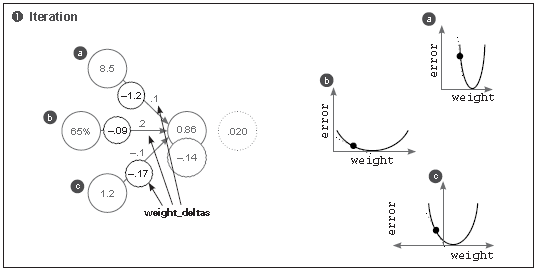

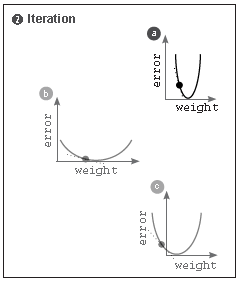 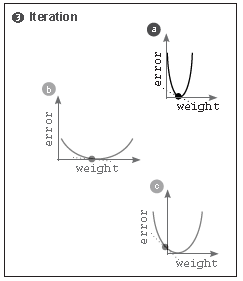

## Gradient descent learning with multiple outputs

In [ ]:
# An empty network with multiple outputs

weights = [0.3, 0.2, 0.9]
def neural_network(input, weights):
  pred = ele_mul(input,weights)
  return pred

In [ ]:
# PREDICT: Making a prediction and calculating error and delta

wlrec = [0.65, 1.0, 1.0, 0.9]
hurt = [0.1, 0.0, 0.0, 0.1]
win = [ 1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]
input = wlrec[0]
true = [hurt[0], win[0], sad[0]]
pred = neural_network(input,weights)

error = [0, 0, 0]
delta = [0, 0, 0]
for i in range(len(true)):
  error[i] = (pred[i] - true[i]) ** 2
  delta[i] = pred[i] - true[i]

print(error)
print(delta)

[0.009025, 0.7569, 0.2352250000000001]
[0.095, -0.87, 0.4850000000000001]


In [ ]:
# COMPARE: Calculating each weight_delta and putting it on each weight

def scalar_ele_mul(number, vector):
  output = [0, 0, 0]
  assert(len(output) == len(vector))

  for i in range(len(vector)):
    output[i] = number*vector[i]
  return output

wlrec = [0.65, 1.0, 1.0, 0.9]

hurt = [0.1, 0.0, 1.0, 0.9]
win = [1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]

input = wlrec[0]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
  error[i] = (pred[i] - true[i]) ** 2
  delta[i] = pred[i] = true[i]

weight_deltas = scalar_ele_mul(input, weights)
print(weight_deltas)

[0.195, 0.13, 0.5850000000000001]


In [ ]:
# LEARN: Updating the weights

input = wlrec[0]
true = [hurt[0], win[0], sad[0]]
pred = neural_network(input, weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
  error[i] = (pred[i] - true[i]) ** 2
  delta[i] = pred[i] - true[i]

weight_deltas = scalar_ele_mul(input, weights)
alpha = 0.1

for i in range(len(weights)):
  weights[i] -= (weight_deltas[i] * alpha)

print("Weights:" + str(weights))
print("weight Deltas:" + str(weight_deltas))

Weights:[0.28049999999999997, 0.187, 0.8415]
weight Deltas:[0.195, 0.13, 0.5850000000000001]


## Gradient descent with multiple inputs and outputs
### Gradient descent generalizes to arbitrarily large networks.

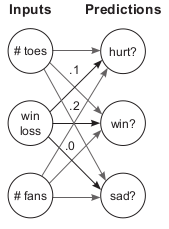

In [ ]:
# An empty network with multiple outputs

#         #toes %win #fans
weights = [[0.1, 0.1, -0.3], # hurt?
           [0.1, 0.2, 0.0],  # win?
           [0.0, 1.3, 0.1]]  # sad?
def w_sum(a, b):
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)) :
    output += (a[i] * b[i])
  return output

def vect_mat_mul(vect, matrix):
  assert(len(vect) == len(matrix))
  output = [0, 0, 0]
  for i in range(len(vect)):
    output[i] = w_sum(vect, matrix[i])
  return output

def neural_network(input, weights):
  pred = vect_mat_mul(input, weights)
  return pred

In [ ]:
# PREDICT: Making a prediction and calculating error and delta

toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt = [0.1, 0.0, 0.0, 0.1]
win = [1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]

alpha = 0.01
input = [toes[0],wlrec[0],nfans[0]]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input, weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
  error[i] = (pred[i] - true[i]) ** 2
  delta[i] = pred[i] - true[i]

In [ ]:
# COMPARE: Calculating each weight_delta and putting it on each weight
import numpy as np

def outer_prod(vec_a, vec_b):
  out = np.zeros((len(vec_a),len(vec_b)))
  for i in range(len(vec_a)):
    for j in range(len(vec_b)):
      out[i][j] = vec_a[i]*vec_b[j]
  return out

input = [toes[0],wlrec[0],nfans[0]]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input,weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
  error[i] = (pred[i] - true[i]) ** 2
  delta[i] = pred[i] - true[i]
weight_deltas = outer_prod(input,delta)

print(weight_deltas)

[[ 3.8675  -0.17     7.3525 ]
 [ 0.29575 -0.013    0.56225]
 [ 0.546   -0.024    1.038  ]]


In [ ]:
# LEARN: Updating the weights

input = [toes[0],wlrec[0],nfans[0]]
true = [hurt[0], win[0], sad[0]]

pred = neural_network(input,weights)

error = [0, 0, 0]
delta = [0, 0, 0]

for i in range(len(true)):
  error[i] = (pred[i] - true[i]) ** 2
  delta[i] = pred[i] - true[i]


weight_deltas = outer_prod(input,delta)

for i in range(len(weights)):
  for j in range(len(weights[0])):
    weights[i][j] -= alpha * weight_deltas[i][j]

print(weights)

[[0.061325, 0.1017, -0.373525], [0.0970425, 0.20013, -0.005622500000000002], [-0.0054600000000000004, 1.30024, 0.08962]]


# Chapter 6 - Introduction to backpropagation
## Building your first deep neural network

## The streetlight problem

In [ ]:
weights = np.array([0., 0.2, -0.5])
alpha = 0.1

streetlights = np.array( [[ 0, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ]])

walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ])

for iteration in range(40):
  error_for_all_lights = 0
  for row_index in range(len(walk_vs_stop)):
    input = streetlights[row_index]
    goal_prediction = walk_vs_stop[row_index]

    prediction = input.dot(weights)

    error = (prediction - goal_prediction) ** 2 # always positive errors, make big errors bigger and small smaller, making it reach the correct answer faster
    error_for_all_lights += error

    delta = prediction - goal_prediction
    weights = weights - (alpha * (input * delta))

    print('Prediction:' + str(prediction))
  print('Weights:' + str(weights))
  print('Error:' + str(error))

## Creating the first deep neural network

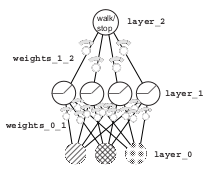

In [ ]:
import numpy as np

np.random.seed(1)

def relu(x):
  return (x>0) * x # <- This function sets all negative numbers to 0

alpha = 0.2
hidden_size = 4

streetlights = np.array([[1, 0, 1],
                         [0, 1, 1],
                         [0, 0, 1],
                         [1, 1, 1]])

walk_vs_stop = np.array([[1, 1, 0, 0]]).T

# Two sets of weights now to connect the three layers (randomly initialized)
weights_0_1 = 2*np.random.random((3, hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size, 1)) -1

layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0, weights_0_1))
# The output of layer_1 is sent through relu, where negative values
# becomes 0. This is the input for the next layer, layer_2
layer_2 = np.dot(layer_1, weights_1_2)

In [ ]:
layer_2

array([0.39194327])

## Backpropagation in code

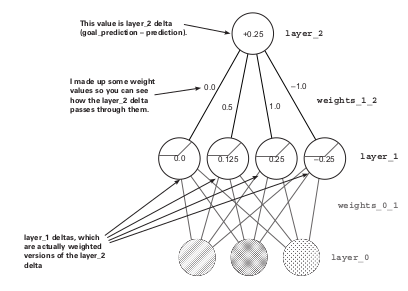

In [ ]:
# You can learn the amount that each weight contributes to the final error.

import numpy as np

np.random.seed(1)

def relu(x):
  return (x > 0) * x # returns x if x>0; return 0 otherwise

def relu2deriv(output):
  return output>0 # returns 1 for input >0; return 0 otherwise

alpha = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3, hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size, 1)) -1

for iteration in range(60):
  layer_2_error = 0
  for i in range(len(streetlights)):
    layer_0 = streetlights[i:i+1]
    layer_1 = relu(np.dot(layer_0, weights_0_1))
    layer_2 = np.dot(layer_1, weights_1_2)

    layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

    layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
    # The following line computer the delta at layer_1 diven the delta of 
    # layer_2 by taking the layer_2_delta and multiplying it by its connecting 
    # weights_1_2
    layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)

    weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

  if (iteration % 10 == 9):
    print("Error:" + str(layer_2_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05


## One iteration of backpropagation

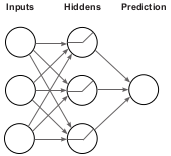

In [ ]:
# Initializing the network’s weights and data

import numpy as np

np.random.seed(1)

def relu(x):
  return (x > 0) * x
def relu2deriv(output):
  return output>0

lights = np.array([[1, 0, 1],
                   [0, 1, 1],
                   [0, 0, 1],
                   [1, 1, 1]])

walk_stop = np.array([[ 1, 1, 0, 0]]).T
alpha = 0.2
hidden_size = 3
weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

print(weights_0_1)
print(weights_1_2)

[[-0.16595599  0.44064899 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.30887855 -0.20646505]]
[[ 0.07763347]
 [-0.16161097]
 [ 0.370439  ]]


In [ ]:
# PREDICT + COMPARE: Making a prediction, and calculating the output error and delta

layer_0 = lights[0:1]
layer_1 = np.dot(layer_0, weights_0_1)
layer_1 = relu(layer_1)
layer_2 = np.dot(layer_1, weights_1_2)

error = (layer_2-walk_stop[0:1]) ** 2

layer_2_delta = (layer_2-walk_stop[0:1])

print(layer_2_delta)

[[-1.02129555]]


In [ ]:
# LEARN: Backpropagating from layer_2 to layer_1


layer_0 = lights[0:1]
layer_1 = np.dot(layer_0, weights_0_1)
layer_1 = relu(layer_1)
layer_2 = np.dot(layer_1, weights_1_2)

error = (layer_2-walk_stop[0:1]) ** 2

layer_2_delta = (layer_2-walk_stop[0:1])

layer_1_delta=layer_2_delta.dot(weights_1_2.T)
layer_1_delta *= relu2deriv(layer_1)

print(layer_1_delta)

[[-0.          0.16505257 -0.        ]]


In [ ]:
# LEARN: Generating weight_deltas, and updating weights

layer_0 = lights[0:1]
layer_1 = np.dot(layer_0, weights_0_1)
layer_1 = relu(layer_1)
layer_2 = np.dot(layer_1, weights_1_2)

error = (layer_2-walk_stop[0:1]) ** 2

layer_2_delta = (layer_2-walk_stop[0:1])

layer_1_delta=layer_2_delta.dot(weights_1_2.T)
layer_1_delta *= relu2deriv(layer_1)


weight_delta_1_2 = layer_1.T.dot(layer_2_delta)
weight_delta_0_1 = layer_0.T.dot(layer_1_delta)
weights_1_2 -= alpha * weight_delta_1_2
weights_0_1 -= alpha * weight_delta_0_1

In [ ]:
print(weights_1_2)
print(weights_0_1)

[[ 0.07763347]
 [-0.13469566]
 [ 0.370439  ]]
[[-0.16595599  0.40763847 -0.99977125]
 [-0.39533485 -0.70648822 -0.81532281]
 [-0.62747958 -0.34188906 -0.20646505]]


In [ ]:
import numpy as np

np.random.seed(1)

def relu(x):
  return (x > 0) * x
def relu2deriv(output):
  return output>0

streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ]])

walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

alpha = 0.2
hidden_size = 4
weights_0_1 = 2*np.random.random((3,hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1

for iteration in range(60):
  layer_2_error = 0
  for i in range(len(streetlights)):
    layer_0 = streetlights[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    layer_2 = np.dot(layer_1,weights_1_2)

    layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)

    layer_2_delta = (layer_2 - walk_vs_stop[i:i+1])
    layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
 
    weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
  if (iteration % 10 == 9):
    print("Error:" + str(layer_2_error))

Error:0.6342311598444467
Error:0.35838407676317513
Error:0.0830183113303298
Error:0.006467054957103705
Error:0.0003292669000750734
Error:1.5055622665134859e-05


# Chapter 7 - How to picture neural networks

# Chapter 8 - Introduction to Regularization and Batching
## learning signal and ignoring noise

In [ ]:
import sys, numpy as np
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
images, labels = (x_train[0:1000].reshape(1000,28*28)/255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1

labels = one_hot_labels
test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
  test_labels[i][l] = 1

np.random.seed(1)

relu = lambda x:(x>=0) * x
relu2deriv = lambda x: x>=0

alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
  error, correct_cnt = (0.0, 0)
  for i in range(len(images)):
    layer_0 = images[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    layer_2 = np.dot(layer_1,weights_1_2)
    error += np.sum((labels[i:i+1] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == \
    np.argmax(labels[i:i+1]))
    layer_2_delta = (labels[i:i+1] - layer_2)
    layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
    * relu2deriv(layer_1)
    weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
  sys.stdout.write("\r"+ \
                  " I:"+str(j)+ \
                  " Error:" + str(error/float(len(images)))[0:5] +\
                  " Correct:" + str(correct_cnt/float(len(images))))

 I:349 Error:0.108 Correct:1.0

In [ ]:
# predicting on test data

if(j % 10 == 0 or j == iterations-1):
  error, correct_cnt = (0.0, 0)
  for i in range(len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    layer_2 = np.dot(layer_1,weights_1_2)
    error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == \
    np.argmax(test_labels[i:i+1]))
sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
" Test-Acc:" + str(correct_cnt/float(len(test_images))))
print()

 Test-Err:0.653 Test-Acc:0.7073


## Implementing Dropout in Code

In [ ]:
import numpy, sys

np.random.seed(1)

def relu2deriv(output):
  return output >= 0

alpha, iterations, hidden_size = (0.005, 300, 100)
pixels_per_image, num_labels = (784, 10)
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
  error, correct_cnt = (0.0,0)
  for i in range(len(images)):
    layer_0 = images[i:i+1]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    dropout_mask = np.random.randint(2, size=layer_1.shape) # add dropout mask
    layer_1 *= dropout_mask * 2 # multiply by 2 because dropout is 50%
    layer_2 = np.dot(layer_1,weights_1_2)

    error += np.sum((labels[i:i+1] - layer_2) ** 2)
    correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))

    layer_2_delta = (labels[i:i+1] - layer_2)
    layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
    layer_1_delta *= dropout_mask # apply dropout to delta

    weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

  if (j%10 == 0):
    test_error = 0.0
    test_correct_cnt = 0
    for i in range(len(test_images)):
      layer_0 = test_images[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1, weights_1_2)
      test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
      test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))


    sys.stdout.write("\n" + \
        
                    "I:" + str(j) + \
                                
                    " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                                
                    " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                                
                    " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                                
                    " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.641 Test-Acc:0.6333 Train-Err:0.891 Train-Acc:0.413
I:10 Test-Err:0.458 Test-Acc:0.787 Train-Err:0.472 Train-Acc:0.764
I:20 Test-Err:0.415 Test-Acc:0.8133 Train-Err:0.430 Train-Acc:0.809
I:30 Test-Err:0.421 Test-Acc:0.8114 Train-Err:0.415 Train-Acc:0.811
I:40 Test-Err:0.419 Test-Acc:0.8112 Train-Err:0.413 Train-Acc:0.827
I:50 Test-Err:0.409 Test-Acc:0.8133 Train-Err:0.392 Train-Acc:0.836
I:60 Test-Err:0.412 Test-Acc:0.8236 Train-Err:0.402 Train-Acc:0.836
I:70 Test-Err:0.412 Test-Acc:0.8033 Train-Err:0.383 Train-Acc:0.857
I:80 Test-Err:0.410 Test-Acc:0.8054 Train-Err:0.386 Train-Acc:0.854
I:90 Test-Err:0.411 Test-Acc:0.8144 Train-Err:0.376 Train-Acc:0.868
I:100 Test-Err:0.411 Test-Acc:0.7903 Train-Err:0.369 Train-Acc:0.864
I:110 Test-Err:0.411 Test-Acc:0.8003 Train-Err:0.371 Train-Acc:0.868
I:120 Test-Err:0.402 Test-Acc:0.8046 Train-Err:0.353 Train-Acc:0.857
I:130 Test-Err:0.408 Test-Acc:0.8091 Train-Err:0.352 Train-Acc:0.867
I:140 Test-Err:0.405 Test-Acc:0.8083 Train-Er

## Batch gradient descent

In [ ]:
import numpy as np
np.random.seed(1)

def relu(x):
  return (x >= 0) * x

def relu2deriv(output):
  return output >= 0

batch_size = 100
alpha, iterations = (0.001, 300)
pixels_per_image, num_labels, hidden_size = (784, 10, 100)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
  error, correct_cnt = (0.0, 0)

  for i in range(int(len(images) / batch_size)):
    batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

    layer_0 = images[batch_start:batch_end]
    layer_1 = relu(np.dot(layer_0,weights_0_1))
    dropout_mask = np.random.randint(2,size=layer_1.shape)
    layer_1 *= dropout_mask * 2
    layer_2 = np.dot(layer_1,weights_1_2)

    error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)

    for k in range(batch_size):
      correct_cnt += int(np.argmax(layer_2[k:k+1]) ==  np.argmax(labels[batch_start+k:batch_start+k+1]))

      layer_2_delta = (labels[batch_start:batch_end]-layer_2) / batch_size
      layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relu2deriv(layer_1)
      layer_1_delta *= dropout_mask

      weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
      weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
  if (j%10 == 0):
    test_error = 0.0
    test_correct_cnt = 0
    for i in range(len(test_images)):
      layer_0 = test_images[i:i+1]
      layer_1 = relu(np.dot(layer_0,weights_0_1))
      layer_2 = np.dot(layer_1, weights_1_2)
      test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
      test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))


    sys.stdout.write("\n" + \
        
                    "I:" + str(j) + \
                                
                    " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                                
                    " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                                
                    " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                                
                    " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.815 Test-Acc:0.3832 Train-Err:1.284 Train-Acc:0.165
I:10 Test-Err:0.568 Test-Acc:0.7173 Train-Err:0.591 Train-Acc:0.672
I:20 Test-Err:0.510 Test-Acc:0.7571 Train-Err:0.532 Train-Acc:0.729
I:30 Test-Err:0.485 Test-Acc:0.7793 Train-Err:0.498 Train-Acc:0.754
I:40 Test-Err:0.468 Test-Acc:0.7877 Train-Err:0.489 Train-Acc:0.749
I:50 Test-Err:0.458 Test-Acc:0.793 Train-Err:0.468 Train-Acc:0.775
I:60 Test-Err:0.452 Test-Acc:0.7995 Train-Err:0.452 Train-Acc:0.799
I:70 Test-Err:0.446 Test-Acc:0.803 Train-Err:0.453 Train-Acc:0.792
I:80 Test-Err:0.451 Test-Acc:0.7968 Train-Err:0.457 Train-Acc:0.786
I:90 Test-Err:0.447 Test-Acc:0.795 Train-Err:0.454 Train-Acc:0.799
I:100 Test-Err:0.448 Test-Acc:0.793 Train-Err:0.447 Train-Acc:0.796
I:110 Test-Err:0.441 Test-Acc:0.7943 Train-Err:0.426 Train-Acc:0.816
I:120 Test-Err:0.442 Test-Acc:0.7966 Train-Err:0.431 Train-Acc:0.813
I:130 Test-Err:0.441 Test-Acc:0.7906 Train-Err:0.434 Train-Acc:0.816
I:140 Test-Err:0.447 Test-Acc:0.7874 Train-Err:0

# Chapter 9 - Activation Functions
## Modelling probabilities and nonlinearities

In [ ]:
# Activation functions (forward prop) and their derivatives (Backprop delta)

# relu
# forward prop
ones_and_zeros = (input > 0)
output = input*ones_and_zeros
# backprop delta
mask = output > 0
deriv = output * mask

# sigmoid
# forward prop
output = 1/(1 + np.exp(-input))
# backprop delta
deriv = output*(1-output)

# tanh
# forward prop
output = np.tanh(input)
# backprop delta
deriv = 1 - (output**2)

# softmax
# forward prop
temp = np.exp(input)
output /= np.sum(temp)
# backprop delta
temp = (output - true)
output = temp/len(true)

In [ ]:
# Upgrading the MNIST network

'''
Theoretically, the tanh function should make for a better hidden-layer activation, and
softmax should make for a better output-layer activation function. When we test them, they
do in fact reach a higher score. But things aren’t always as simple as they seem.
I had to make a couple of adjustments in order to tune the network properly with these
new activations. For tanh , I had to reduce the standard deviation of the incoming
weights. Remember that you initialize the weights randomly. np.random.random creates
a random matrix with numbers randomly spread between 0 and 1. By multiplying by 0.2
and subtracting by 0.1, you rescale this random range to be between –0.1 and 0.1. This
worked great for relu but is less optimal for tanh . tanh likes to have a narrower random
initialization, so I adjusted it to be between –0.01 and 0.01.
I also removed the error calculation, because we’re not ready for that yet. Technically,
softmax is best used with an error function called cross entropy. This network properly
computes layer_2_delta for this error measure, but because we haven’t analyzed why this
error function is advantageous, I removed the lines to compute it.
Finally, as with almost all changes made to a neural network, I had to revisit the alpha
tuning. I found that a much higher alpha was required to reach a good score within 300
iterations. And voilà! As expected, the network reached a higher testing accuracy of 87%.
'''

import numpy as np, sys
np.random.seed(1)

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28)\
											/ 255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1

labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))

for i,l in enumerate(y_test):
  test_labels[i][l] = 1

def tanh(x):
  return np.tanh(x)

def tanh2deriv(output):
  return 1 - (output ** 2)

def softmax(x):
  temp = np.exp(x)
  return temp / np.sum(temp, axis=1, keepdims=True)

alpha, iterations, hidden_size = (2, 300, 100)
pixels_per_image, num_labels = (784, 10)
batch_size = 100

weights_0_1 = 0.02*np.random.random((pixels_per_image,hidden_size))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
  correct_cnt = 0
  for i in range(int(len(images) / batch_size)):
    batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
    layer_0 = images[batch_start:batch_end]
    layer_1 = tanh(np.dot(layer_0,weights_0_1))
    dropout_mask = np.random.randint(2,size=layer_1.shape)
    layer_1 *= dropout_mask * 2
    layer_2 = softmax(np.dot(layer_1,weights_1_2))
    for k in range(batch_size):
      correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

    layer_2_delta = (labels[batch_start:batch_end]-layer_2) / (batch_size * layer_2.shape[0])
    layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)
    layer_1_delta *= dropout_mask

    weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
    weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
    
  test_correct_cnt = 0

  for i in range(len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_1 = tanh(np.dot(layer_0,weights_0_1))
    layer_2 = np.dot(layer_1,weights_1_2)
    test_correct_cnt += int(np.argmax(layer_2) == \
                          np.argmax(test_labels[i:i+1]))
  if (j % 10 == 0):
    sys.stdout.write("\n"+ "I:" + str(j) + \
    " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
    " Train-Acc:" + str(correct_cnt/float(len(images))))

11493376/11490434 [==============================] - 0s 0us/step

I:0 Test-Acc:0.394 Train-Acc:0.156
I:10 Test-Acc:0.6867 Train-Acc:0.723
I:20 Test-Acc:0.7025 Train-Acc:0.732
I:30 Test-Acc:0.734 Train-Acc:0.763
I:40 Test-Acc:0.7663 Train-Acc:0.794
I:50 Test-Acc:0.7913 Train-Acc:0.819
I:60 Test-Acc:0.8102 Train-Acc:0.849
I:70 Test-Acc:0.8228 Train-Acc:0.864
I:80 Test-Acc:0.831 Train-Acc:0.867
I:90 Test-Acc:0.8364 Train-Acc:0.885
I:100 Test-Acc:0.8407 Train-Acc:0.883
I:110 Test-Acc:0.845 Train-Acc:0.891
I:120 Test-Acc:0.8481 Train-Acc:0.901
I:130 Test-Acc:0.8505 Train-Acc:0.901
I:140 Test-Acc:0.8526 Train-Acc:0.905
I:150 Test-Acc:0.8555 Train-Acc:0.914
I:160 Test-Acc:0.8577 Train-Acc:0.925
I:170 Test-Acc:0.8596 Train-Acc:0.918
I:180 Test-Acc:0.8619 Train-Acc:0.933
I:190 Test-Acc:0.863 Train-Acc:0.933
I:200 Test-Acc:0.8642 Train-Acc:0.926
I:210 Test-Acc:0.8653 Train-Acc:0.931
I:220 Test-Acc:0.8668 Train-Acc:0.93
I:230 Test-Acc:0.8672 Train-Acc:0.937
I:240 Test-Acc:0.8681 Train-Acc:0.938
I

# Chapter 10 - Intro to Convolutional Neural Netwroks
## neural learning about edges and corners

In [ ]:
# Taking the previous implementation and swapping the first layer for a convolutional layer

import numpy as np, sys
np.random.seed(1)

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])
one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
  one_hot_labels[i][l] = 1

labels = one_hot_labels
test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))

for i,l in enumerate(y_test):
  test_labels[i][l] = 1

def tanh(x):
  return np.tanh(x)

def tanh2deriv(output):
  return 1 - (output ** 2)

def softmax(x):
  temp = np.exp(x)
  return temp / np.sum(temp, axis=1, keepdims=True)

alpha, iterations = (2, 300)
pixels_per_image, num_labels = (784, 10)
batch_size = 128

input_rows = 28
input_cols = 28

kernel_rows = 3
kernel_cols = 3
num_kernels = 16

hidden_size = ((input_rows - kernel_rows) * (input_cols - kernel_cols)) * num_kernels
kernels = 0.02*np.random.random((kernel_rows*kernel_cols, num_kernels))-0.01
weights_1_2 = 0.2*np.random.random((hidden_size, num_labels)) - 0.1

def get_image_section(layer,row_from, row_to, col_from, col_to):
  section = layer[:,row_from:row_to,col_from:col_to]
  return section.reshape(-1,1,row_to-row_from, col_to-col_from)

for j in range(iterations):
  correct_cnt = 0
  for i in range(int(len(images) / batch_size)):
    batch_start, batch_end=((i * batch_size),((i+1)*batch_size))
    layer_0 = images[batch_start:batch_end]
    layer_0 = layer_0.reshape(layer_0.shape[0],28,28)
    layer_0.shape
    sects = list()
    for row_start in range(layer_0.shape[1]-kernel_rows):

      for col_start in range(layer_0.shape[2] - kernel_cols):
        sect = get_image_section(layer_0, 
                                row_start, 
                                row_start+kernel_rows, 
                                col_start, 
                                col_start+kernel_cols)
        sects.append(sect)

    expanded_input = np.concatenate(sects,axis=1)
    es = expanded_input.shape
    flattened_input = expanded_input.reshape(es[0]*es[1],-1)

    kernel_output = flattened_input.dot(kernels)
    layer_1 = tanh(kernel_output.reshape(es[0],-1))
    dropout_mask = np.random.randint(2,size=layer_1.shape)
    layer_1 *= dropout_mask * 2
    layer_2 = softmax(np.dot(layer_1,weights_1_2))

    for k in range(batch_size):
      labelset = labels[batch_start+k:batch_start+k+1]
      _inc = int(np.argmax(layer_2[k:k+1]) == np.argmax(labelset))
      correct_cnt += _inc

    layer_2_delta = (labels[batch_start:batch_end]-layer_2) / (batch_size * layer_2.shape[0])

    layer_1_delta = layer_2_delta.dot(weights_1_2.T) * tanh2deriv(layer_1)

    layer_1_delta *= dropout_mask
    weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
    l1d_reshape = layer_1_delta.reshape(kernel_output.shape)
    k_update = flattened_input.T.dot(l1d_reshape)
    kernels -= alpha * k_update

  test_correct_cnt = 0

  for i in range(len(test_images)):
    layer_0 = test_images[i:i+1]
    layer_0 = layer_0.reshape(layer_0.shape[0],28,28)
    layer_0.shape
    sects = list()
    for row_start in range(layer_0.shape[1]-kernel_rows):
      for col_start in range(layer_0.shape[2] - kernel_cols):
        sect = get_image_section(layer_0, row_start, 
                                 row_start+kernel_rows, 
                                 col_start, 
                                 col_start+kernel_cols)
        sects.append(sect)

    expanded_input = np.concatenate(sects,axis=1)
    es = expanded_input.shape
    flattened_input = expanded_input.reshape(es[0]*es[1],-1)

    kernel_output = flattened_input.dot(kernels)
    layer_1 = tanh(kernel_output.reshape(es[0],-1))
    layer_2 = np.dot(layer_1,weights_1_2)
    test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

  if (j % 1 == 0):
    sys.stdout.write("\n"+ \
                    "I:" + str(j) + \
                    " Test-Acc:"+str(test_correct_cnt/float(len(test_images)))+\
                    " Train-Acc:" + str(correct_cnt/float(len(images))))


I:0 Test-Acc:0.0288 Train-Acc:0.055
I:1 Test-Acc:0.0273 Train-Acc:0.037
I:2 Test-Acc:0.028 Train-Acc:0.037
I:3 Test-Acc:0.0292 Train-Acc:0.04
I:4 Test-Acc:0.0339 Train-Acc:0.046
I:5 Test-Acc:0.0478 Train-Acc:0.068
I:6 Test-Acc:0.076 Train-Acc:0.083
I:7 Test-Acc:0.1316 Train-Acc:0.096
I:8 Test-Acc:0.2137 Train-Acc:0.127
I:9 Test-Acc:0.2941 Train-Acc:0.148
I:10 Test-Acc:0.3563 Train-Acc:0.181
I:11 Test-Acc:0.4023 Train-Acc:0.209
I:12 Test-Acc:0.4358 Train-Acc:0.238
I:13 Test-Acc:0.4473 Train-Acc:0.286
I:14 Test-Acc:0.4389 Train-Acc:0.274
I:15 Test-Acc:0.3951 Train-Acc:0.257
I:16 Test-Acc:0.2222 Train-Acc:0.243
I:17 Test-Acc:0.0613 Train-Acc:0.112
I:18 Test-Acc:0.0266 Train-Acc:0.035
I:19 Test-Acc:0.0127 Train-Acc:0.026
I:20 Test-Acc:0.0133 Train-Acc:0.022
I:21 Test-Acc:0.0185 Train-Acc:0.038
I:22 Test-Acc:0.0363 Train-Acc:0.038
I:23 Test-Acc:0.0928 Train-Acc:0.067
I:24 Test-Acc:0.1994 Train-Acc:0.081
I:25 Test-Acc:0.3086 Train-Acc:0.154
I:26 Test-Acc:0.4276 Train-Acc:0.204
I:27 Test-Acc

# Chapter 11 - NPL: king - man + woman == ?
## Neural networks that understand language

In [ ]:
# to be added